In [1]:
import pandas as pd
import os
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from scipy.stats import lognorm
import seaborn as sns

%load_ext lab_black

In [2]:
# PLOT RESULTS (time difference between first case in UK and first detection)

df = pd.read_csv(
    os.path.join(
        "..", "..", "models", "simulated_data", "230320_avian_flu", "Germany.csv"
    )
)

phi_bd = 0.1
com_tests = 15000
phi_cd = com_tests / 67e6
phi_hd = 0.1

phi_hs = 0.1
phi_cs = phi_cd

R0 = 1.2

ihr_scenarios = {
    "Mild flat": [1, 1, 1, 1],
    "Mild monotonic": [0.0041, 0.0409, 0.4091, 4.0913],
    "Mild young risk": [3.82, 0.38, 0.04, 3.82],
    "Severe flat": [5, 5, 5, 5],
    "Severe monotonic": [0.0205, 0.2046, 2.0457, 20.4566],
    "Severe young risk": [33.552, 3.355, 3.355, 3.355],
    "Severe flat": [10, 10, 10, 10],
    "Severe monotonic": [0.0409, 0.4091, 4.0913, 40.9133],
    "Severe young risk": [33.552, 3.355, 3.355, 3.355],
    "Extra severe flat": [10, 10, 10, 10],
    "Extra severe monotonic": [0.0409, 0.4091, 4.0913, 40.9133],
    "Extra severe young risk": [38.152, 3.815, 0.382, 38.152],
}

ihrs = np.array(ihr_scenarios["Mild flat"]) / 100

res = df.loc[
    (df.R0 == R0)
    & np.isclose(df.ihr_1, ihrs[0])
    & np.isclose(df.ihr_2, ihrs[1])
    & np.isclose(df.ihr_3, ihrs[2])
    & np.isclose(df.ihr_4, ihrs[3])
]

t_seed, t_ww, t_bd, t_hd, t_cd = (
    res["seed_t"],
    res["ww_time"],
    res["bd_time"],
    res["hd_time"],
    res["cd_time"],
)


nwd_testd, nbd_tests, nhd_test, ncd_tests = (
    res["ww_nd_tests"],
    res["bs_nd_tests"],
    res["hs_nd_tests"],
    res["cs_nd_tests"],
)
nwt_testd, nbt_tests, nht_test, nct_tests = (
    res["ww_nt_tests"],
    res["bs_nt_tests"],
    res["hs_nt_tests"],
    res["cs_nt_tests"],
)

c_hosp_1, c_hosp_2, c_hosp_3, c_hosp_4 = (
    res["c_hosp_1"],
    res["c_hosp_2"],
    res["c_hosp_3"],
    res["c_hosp_4"],
)
c_inf_1, c_inf_2, c_inf_3, c_inf_4 = (
    res["c_inf_1"],
    res["c_inf_2"],
    res["c_inf_3"],
    res["c_inf_4"],
)

ww_c_infected_1, ww_c_infected_2, ww_c_infected_3, ww_c_infected_4 = (
    res["ww_c_infected_1"],
    res["ww_c_infected_2"],
    res["ww_c_infected_3"],
    res["ww_c_infected_4"],
)
bs_c_infected_1, bs_c_infected_2, bs_c_infected_3, bs_c_infected_4 = (
    res["bs_c_infected_1"],
    res["bs_c_infected_2"],
    res["bs_c_infected_3"],
    res["bs_c_infected_4"],
)
hs_c_infected_1, hs_c_infected_2, hs_c_infected_3, hs_c_infected_4 = (
    res["hs_c_infected_1"],
    res["hs_c_infected_2"],
    res["hs_c_infected_3"],
    res["hs_c_infected_4"],
)
cs_c_infected_1, cs_c_infected_2, cs_c_infected_3, cs_c_infected_4 = (
    res["cs_c_infected_1"],
    res["cs_c_infected_2"],
    res["cs_c_infected_3"],
    res["cs_c_infected_4"],
)

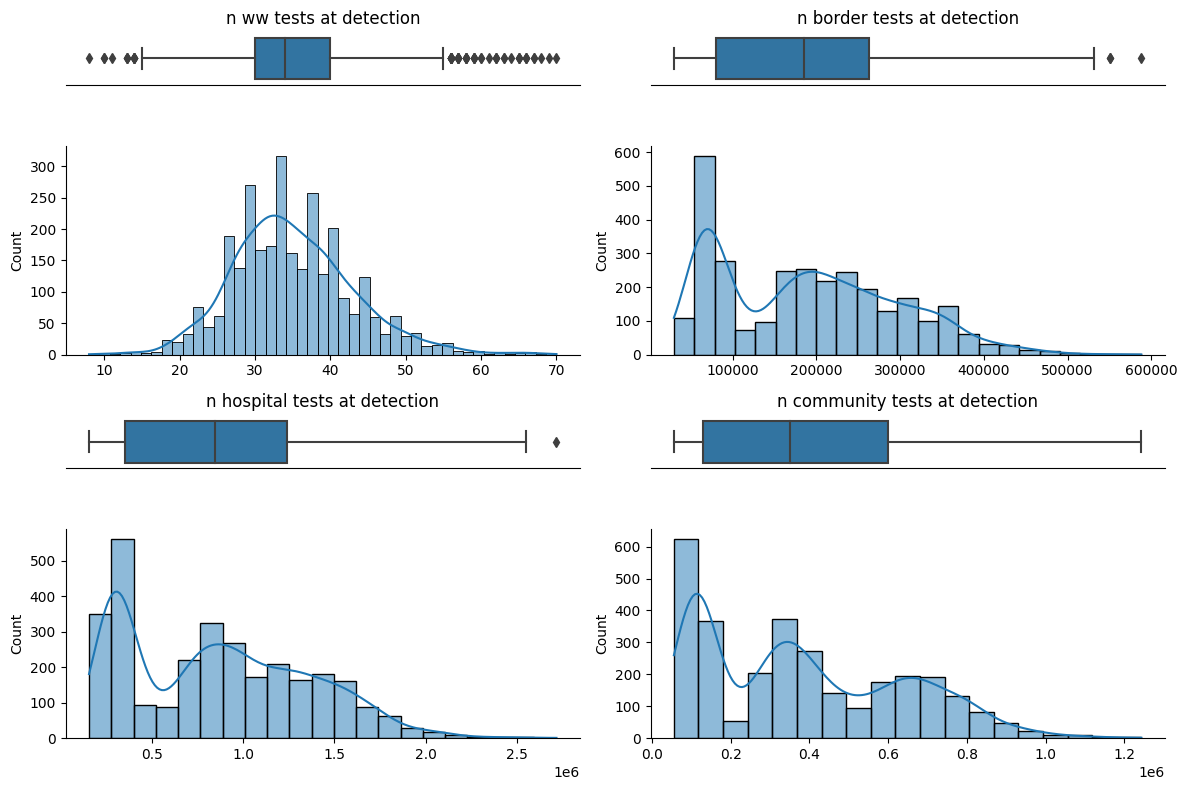

In [3]:
titles = [
    "n ww tests at detection",
    "n border tests at detection",
    "n hospital tests at detection",
    "n community tests at detection",
]

fig, axs = plt.subplots(
    4, 2, figsize=(12, 8), gridspec_kw={"height_ratios": (0.2, 0.8, 0.2, 0.8)}
)

for i, d in enumerate([nwd_testd, nbd_tests, nhd_test, ncd_tests]):
    ax_box = axs[i // 2 * 2, i % 2]
    ax_hist = axs[i // 2 * 2 + 1, i % 2]

    # ax_box.boxplot(d)
    # ax_hist.hist(d)
    sns.boxplot(d.values, ax=ax_box, orient="h")
    sns.histplot(d.values, ax=ax_hist, kde=True)

    ax_box.set(yticks=[], xticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
    axs[i // 2 * 2, i % 2].set_title(titles[i])
plt.tight_layout()

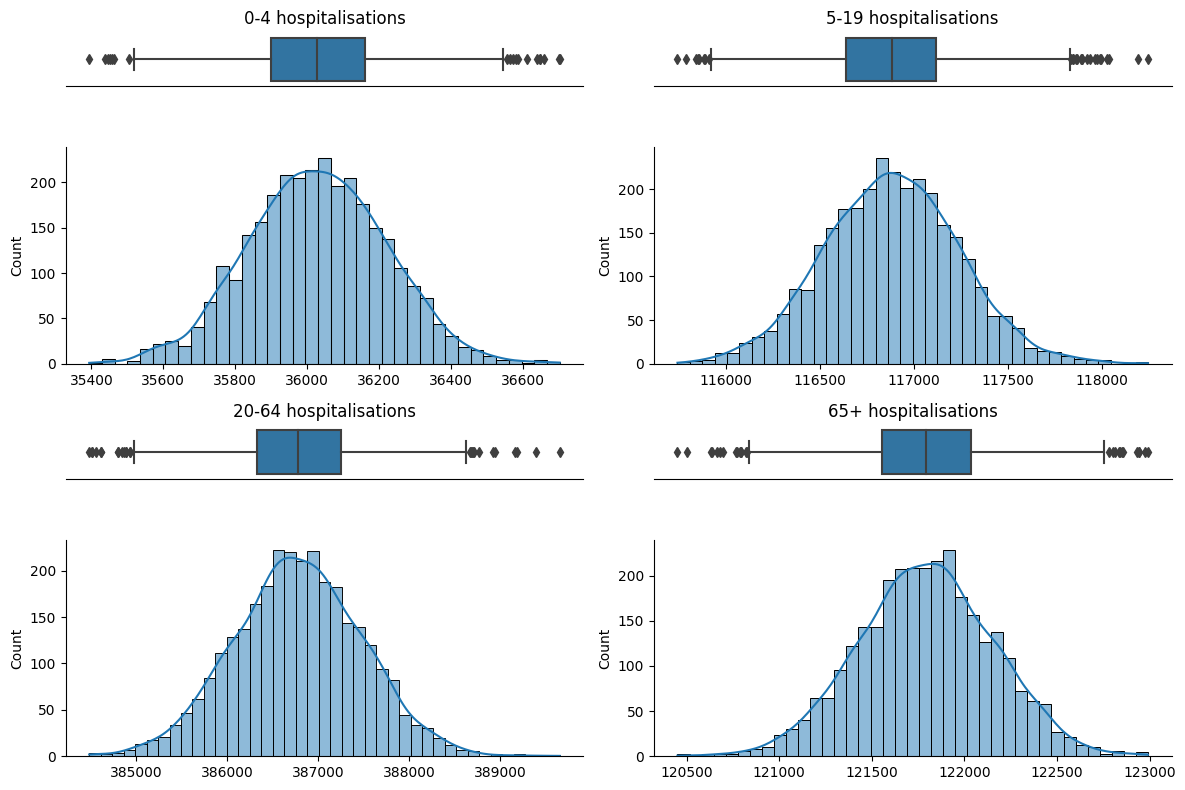

In [4]:
titles = [
    "0-4 hospitalisations",
    "5-19 hospitalisations",
    "20-64 hospitalisations",
    "65+ hospitalisations",
]


fig, axs = plt.subplots(
    4, 2, figsize=(12, 8), gridspec_kw={"height_ratios": (0.2, 0.8, 0.2, 0.8)}
)

for i, d in enumerate([c_hosp_1, c_hosp_2, c_hosp_3, c_hosp_4]):
    ax_box = axs[i // 2 * 2, i % 2]
    ax_hist = axs[i // 2 * 2 + 1, i % 2]

    # ax_box.boxplot(d)
    # ax_hist.hist(d)
    sns.boxplot(d.values, ax=ax_box, orient="h")
    sns.histplot(d.values, ax=ax_hist, kde=True)

    ax_box.set(yticks=[], xticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
    axs[i // 2 * 2, i % 2].set_title(titles[i])
plt.tight_layout()

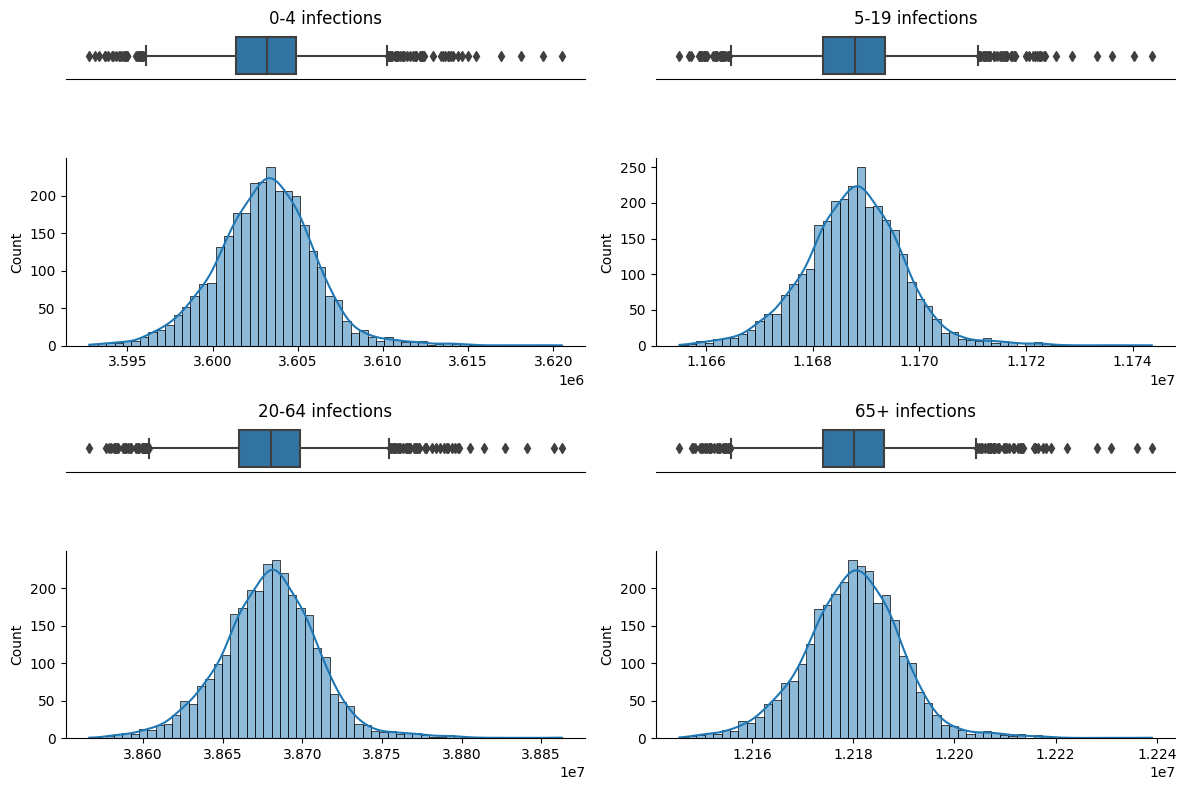

In [5]:
titles = ["0-4 infections", "5-19 infections", "20-64 infections", "65+ infections"]
fig, axs = plt.subplots(
    4, 2, figsize=(12, 8), gridspec_kw={"height_ratios": (0.2, 0.8, 0.2, 0.8)}
)

for i, d in enumerate([c_inf_1, c_inf_2, c_inf_3, c_inf_4]):
    ax_box = axs[i // 2 * 2, i % 2]
    ax_hist = axs[i // 2 * 2 + 1, i % 2]

    # ax_box.boxplot(d)
    # ax_hist.hist(d)
    sns.boxplot(d.values, ax=ax_box, orient="h")
    sns.histplot(d.values, ax=ax_hist, kde=True)

    ax_box.set(yticks=[], xticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
    axs[i // 2 * 2, i % 2].set_title(titles[i])
plt.tight_layout()

0
1
2
3


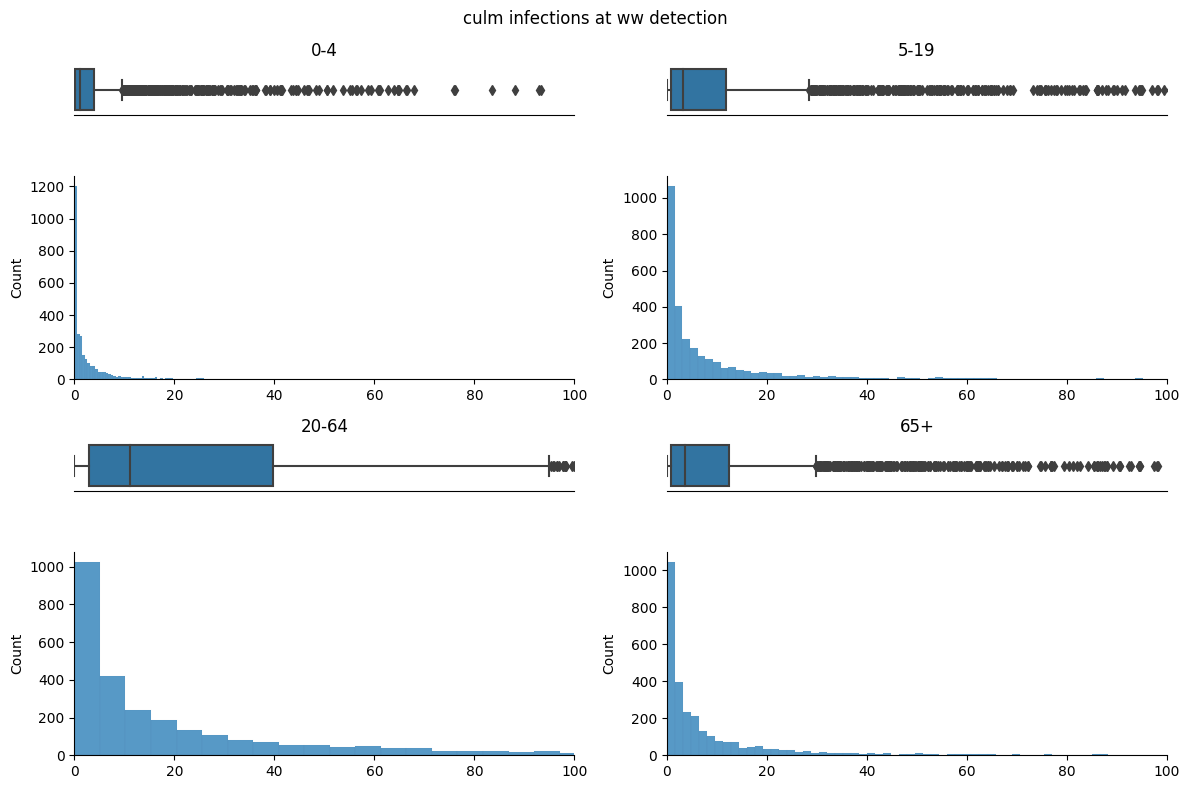

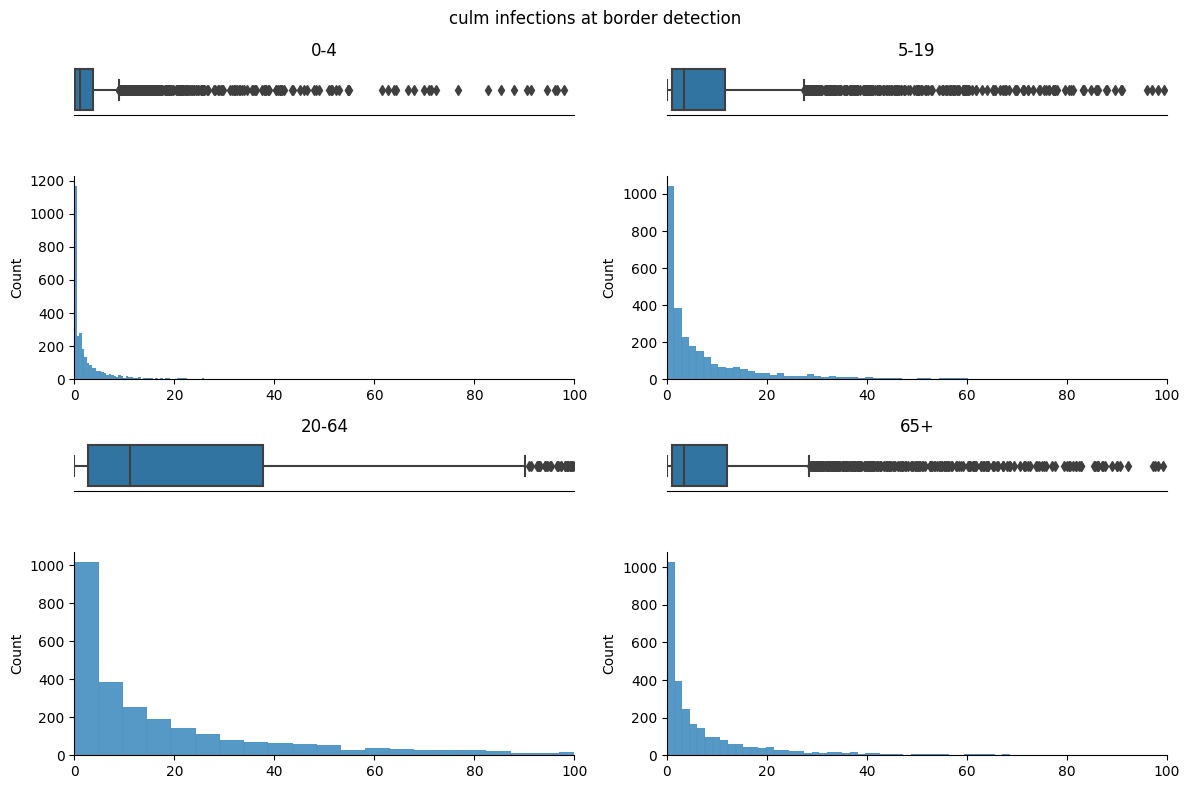

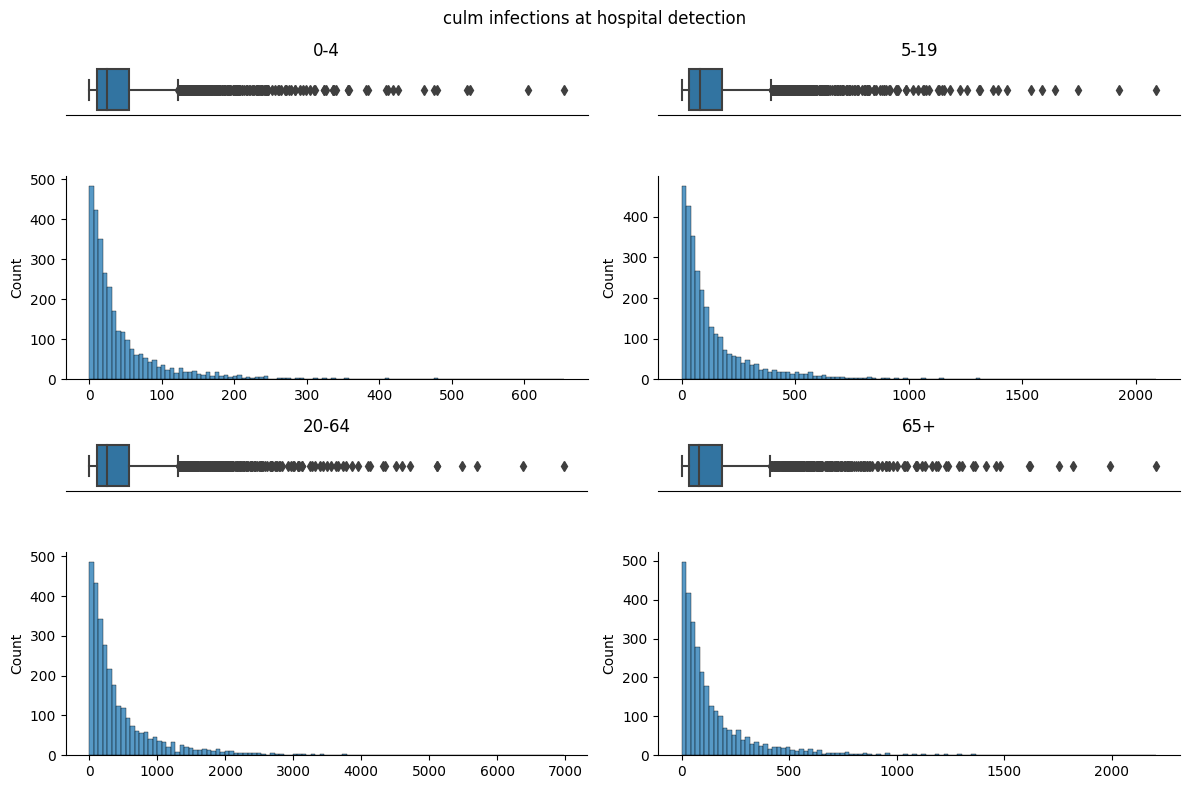

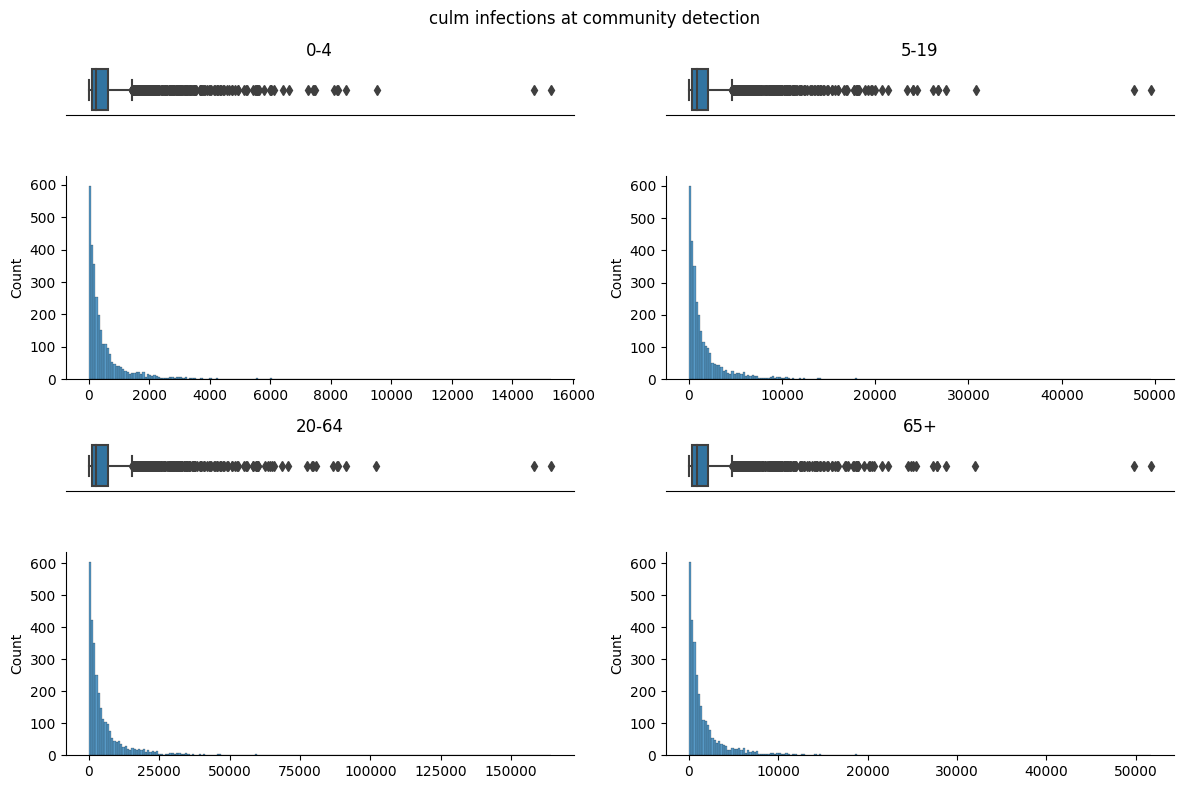

In [6]:
inf_detected = [
    [ww_c_infected_1, ww_c_infected_2, ww_c_infected_3, ww_c_infected_4],
    [bs_c_infected_1, bs_c_infected_2, bs_c_infected_3, bs_c_infected_4],
    [hs_c_infected_1, hs_c_infected_2, hs_c_infected_3, hs_c_infected_4],
    [cs_c_infected_1, cs_c_infected_2, cs_c_infected_3, cs_c_infected_4],
]

big_titles = [
    "culm infections at ww detection",
    "culm infections at border detection",
    "culm infections at hospital detection",
    "culm infections at community detection",
]


for j in range(4):
    fig, axs = plt.subplots(
        4, 2, figsize=(12, 8), gridspec_kw={"height_ratios": (0.2, 0.8, 0.2, 0.8)}
    )

    titles = ["0-4", "5-19", "20-64", "65+"]
    fig.suptitle(big_titles[j])
    print(j)
    for i, d in enumerate(inf_detected[j]):
        ax_box = axs[i // 2 * 2, i % 2]
        ax_hist = axs[i // 2 * 2 + 1, i % 2]

        # ax_box.boxplot(d)
        # ax_hist.hist(d)
        if j in [0, 1]:
            sns.boxplot(d.values, ax=ax_box, orient="h")
            sns.histplot(d.values, ax=ax_hist)
            xmax = 100
            ax_hist.set_xlim(xmin=0.0, xmax=xmax)
            ax_box.set_xlim(xmin=0.0, xmax=xmax)
        else:
            sns.boxplot(d.values, ax=ax_box, orient="h")
            sns.histplot(d.values, ax=ax_hist)

        ax_box.set(yticks=[], xticks=[])
        sns.despine(ax=ax_hist)
        sns.despine(ax=ax_box, left=True)
        axs[i // 2 * 2, i % 2].set_title(titles[i])
    plt.tight_layout()

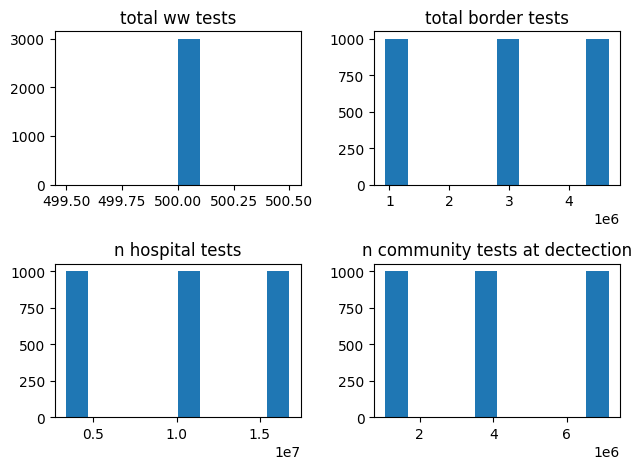

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
axs = (ax1, ax2, ax3, ax4)
titles = [
    "total ww tests",
    "total border tests",
    "n hospital tests",
    "n community tests at dectection",
]

for i, d in enumerate([nwt_testd, nbt_tests, nht_test, nct_tests]):
    axs[i].hist(d)
    axs[i].set_title(titles[i])
plt.tight_layout()

## Confidence intervals

In [8]:
def histogram_intersection(h1, h2, bins):
    bins = np.diff(bins)
    sm = 0
    for i in range(len(bins)):
        sm += min(h1[i],h2[i])
    return sm

n_bins = 100
n_simulations = 1000
counts_c, bins_c = np.histogram(diff_c, bins = n_bins)
counts_b, bins_b = np.histogram(diff_b, bins =bins_c)
counts_h, bins_h = np.histogram(diff_h, bins = bins_c)



print(histogram_intersection(counts_b, counts_h, bins_c)/n_simulations)
print(histogram_intersection(counts_b, counts_c, bins_c)/n_simulations)
print(histogram_intersection(counts_h, counts_c, bins_c)/n_simulations)
print()
print(np.sum(t_screen_b-t_screen_h > 0)/n_simulations)
print(np.sum(t_screen_b-t_screen_c > 0)/n_simulations)
print(np.sum(t_screen_h-t_screen_c > 0)/n_simulations)

NameError: name 'diff_c' is not defined